# TEAM COMPARISON ANALYSIS

In [2]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting the path to access the data
path = r"C:\Users\Mihir\8_CAPSTONE PROJECT\S1_Data_Preprocessing\1_Preprocessing_Data_&_EDA_LEVEL_0\\"
path

'C:\\Users\\Mihir\\8_CAPSTONE PROJECT\\S1_Data_Preprocessing\\1_Preprocessing_Data_&_EDA_LEVEL_0\\\\'

In [4]:
# reading required csv files
appearances = pd.read_csv(path + "appearances_df_no_win.csv")
players = pd.read_csv(path + "players_df_winsorised.csv")
games = pd.read_csv(path + "games_df_winsorised.csv")
game_events = pd.read_csv(path + "game_events_df_no_win.csv")
test = pd.read_csv(path + "test data.csv")

# Connecting Python To SQL

In [6]:
import mysql.connector as sql

In [7]:
host = 'localhost'
user = 'root'
password = '1234'
database = 'football_analysis_eda'

db = sql.connect(host = host, user = user, password = password, 
           database = database)
print("Connection Established- to Database: ", db)

mycursor = db.cursor()
print("Connection to Retrieve data: ", mycursor)

Connection Established- to Database:  <mysql.connector.connection_cext.CMySQLConnection object at 0x000001CF5E7B66D0>
Connection to Retrieve data:  CMySQLCursor: (Nothing executed yet)


In [8]:
# Retrieving Data From MySQL Server
## By Creating a View
query = '''SELECT * FROM TEAM_HOME_PERFORMANCE;'''
TEAM_HOME_PERFORMANCE = pd.read_sql_query(query,db)

query2 = '''SELECT * FROM TEAM_AWAY_PERFORMANCE;'''
TEAM_AWAY_PERFORMANCE = pd.read_sql_query(query2,db)

query3 = '''SELECT * FROM TEAM_MANAGER_PERFORMANCE;'''
TEAM_MANAGER_PERFORMANCE = pd.read_sql_query(query3,db)

query4 = '''SELECT * FROM TEAM_WIN_RATIO;'''
TEAM_WIN_RATIO = pd.read_sql_query(query4,db)

query5 = '''SELECT * FROM TEAM_POSITION_OUTCOME;'''
TEAM_POSITION_OUTCOME = pd.read_sql_query(query5,db)

query6 = '''SELECT * FROM TEAM_SEASON_PERFORMANCE;'''
TEAM_SEASON_PERFORMANCE = pd.read_sql_query(query6,db)
db.close()

# 1. How do teams compare based on goals scored and in home and away games?

In [10]:
display(TEAM_HOME_PERFORMANCE.iloc[:3, :])
print(TEAM_HOME_PERFORMANCE['home_club_name'].values[:3])

,home_club_name,avg_home_goals_scored,avg_away_goals_conceded,better_perform
0,FK Zarya Lugansk,3.0,0.0,HOME
1,Futbol Club Barcelona,3.0,0.0,HOME
2,Athlitiki Enosi Konstantinoupoleos,3.0,0.0,HOME


['FK Zarya Lugansk' 'Futbol Club Barcelona'
 'Athlitiki Enosi Konstantinoupoleos']


In [11]:
display(TEAM_AWAY_PERFORMANCE.iloc[:3, :])
print(TEAM_AWAY_PERFORMANCE['away_club_name'].values[:3])

,away_club_name,avg_home_goals_scored,avg_away_goals_conceded,better_perform
0,Racing Club de Strasbourg Alsace,1.0,4.0,AWAY
1,FC Shakhtar Donetsk,2.0,4.0,AWAY
2,RFK Akhmat Grozny,0.0,3.0,AWAY


['Racing Club de Strasbourg Alsace' 'FC Shakhtar Donetsk'
 'RFK Akhmat Grozny']


# 2. What are the differences in team performance based on manager names or strategies?

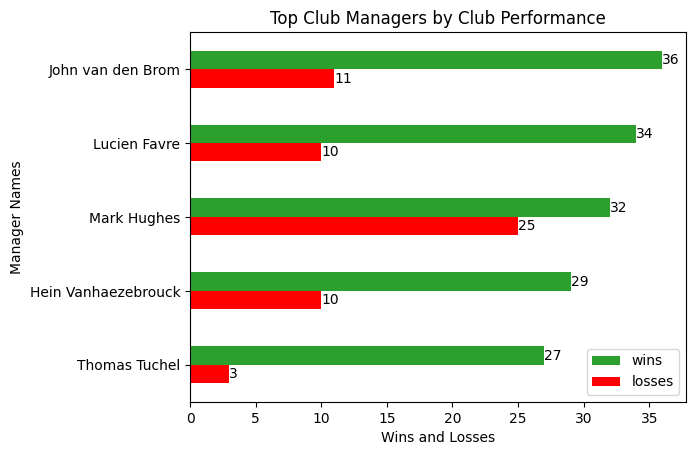

In [13]:
TEAM_MANAGER_PERFORMANCE.head(5).set_index('home_club_manager_name').plot(kind = "barh", color = {'wins': 'tab:green', 'losses': "red"})
plt.gca().invert_yaxis()
for container in plt.gca().containers:
    plt.bar_label(container, fmt = '%.0f')
plt.title('Top Club Managers by Club Performance')
plt.xlabel('Wins and Losses')
plt.ylabel('Manager Names');

# 3.Which teams have the best win/loss ratio in various competitions?

In [15]:
competitions_dict = {}
for i in TEAM_WIN_RATIO['competition_type'].unique()[:-1]:
    cond = TEAM_WIN_RATIO['competition_type'] == i
    print(i)
    create_df = TEAM_WIN_RATIO[cond][['home_club_name','wins', 'loses', 'win_loss_ratio']].head(5)
    competitions_dict[i] = create_df
    display(create_df)

domestic_league


,home_club_name,wins,loses,win_loss_ratio
0,FC Bayern Munich,23.0,1.0,23.0
1,Arsenal Football Club,18.0,1.0,18.0
2,F.C. Copenhagen,11.0,1.0,11.0
3,Football Club Utrecht,9.0,1.0,9.0
5,Football Club Nords,24.0,3.0,8.0


international_cup


,home_club_name,wins,loses,win_loss_ratio
4,Tottenham Hotspur Football Club,9.0,1.0,9.0
25,Chelsea Football Club,3.0,1.0,3.0
26,Stade Rennais Football Club,3.0,1.0,3.0
39,Koninklijke Atletiek Associatie Gent,6.0,3.0,2.0
43,AFC Ajax Amsterdam,4.0,2.0,2.0


domestic_cup


,home_club_name,wins,loses,win_loss_ratio
20,Stichting Betaald Voetbal Vitesse Arnhem,3.0,1.0,3.0
21,FC Bayern Munich,3.0,1.0,3.0
38,Associazione Sportiva Roma,2.0,1.0,2.0
41,Eintracht Frankfurt Fuayball AG,4.0,2.0,2.0
42,Borussia Dortmund,2.0,1.0,2.0


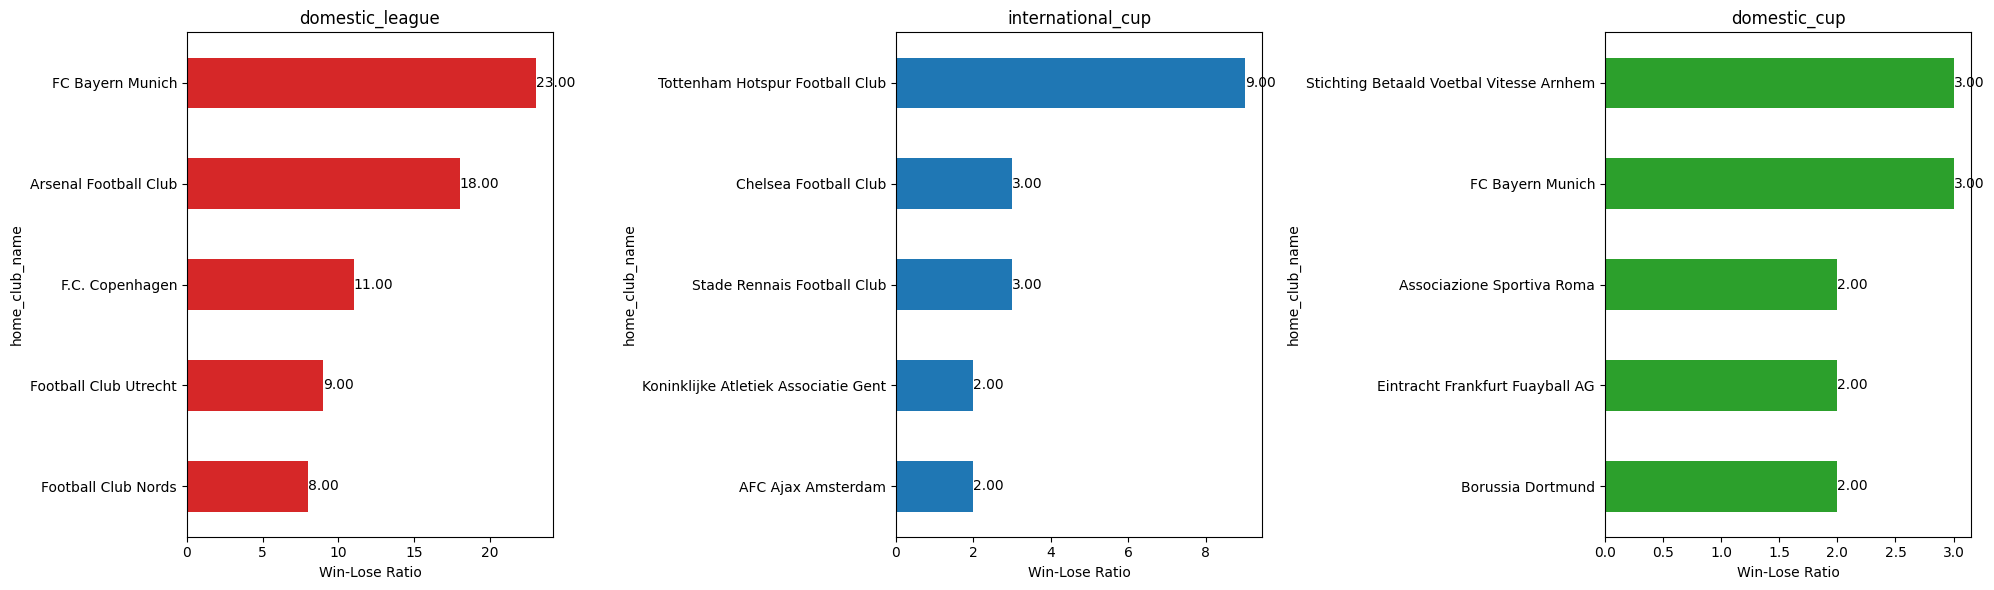

In [16]:
fig, ax = plt.subplots(1, 3, figsize = (20, 6))
ax = ax.flatten()

colors = ['tab:red', 'tab:blue', 'tab:green']
for index, (labels, frame) in enumerate(competitions_dict.items()):
    frame.plot(kind = 'barh', x = 'home_club_name', y = 'win_loss_ratio', ax = ax[index], color = colors[index], legend = False)
    ax[index].invert_yaxis()
    for container in ax[index].containers:
        ax[index].bar_label(container, fmt = '%.2f')
    ax[index].set_title(labels)
    ax[index].set_xlabel('Win-Lose Ratio') 
plt.tight_layout(rect = [0, 0, 1, 1]);

# 4. How does the position of the clubs affect match outcomes?

,home_club_position,home_away_win_ratio,TOTAL_WINS
home_club_position,1.000000,-0.593508,-0.520320
home_away_win_ratio,-0.593508,1.000000,0.048801
TOTAL_WINS,-0.520320,0.048801,1.000000


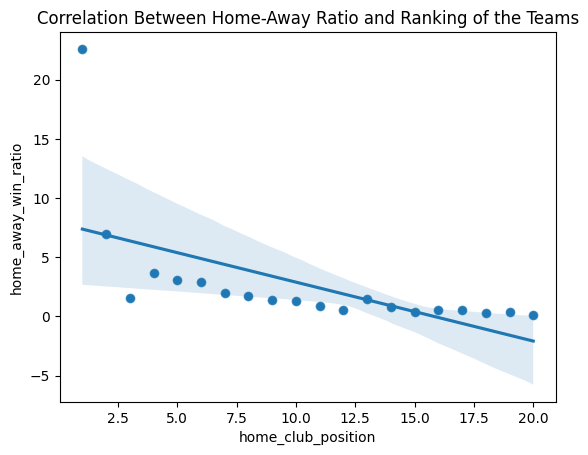

In [18]:
display(TEAM_POSITION_OUTCOME.drop(columns = ['home_wins','away_wins'], axis = 1).corr().style.background_gradient(cmap = 'coolwarm'))

TEAM_POSITION_OUTCOME.plot(kind = 'scatter', x = 'home_club_position', y = 'home_away_win_ratio')
sns.regplot(x='home_club_position', y='home_away_win_ratio', data=TEAM_POSITION_OUTCOME)
plt.title('Correlation Between Home-Away Ratio and Ranking of the Teams');

# 5. How do teams’ performances vary across different seasons and competitions?    --(IN TABLEAU FOR DEEPER ANALYSIS)

# Hypothesis Testing

In [46]:
# Extract data
home_goals = games['home_club_goals']
away_goals = games['away_club_goals']

# Calculate means, variances, and sample sizes
mean_home = np.mean(home_goals)
mean_away = np.mean(away_goals)

var_home = np.var(home_goals, ddof=1)  
var_away = np.var(away_goals, ddof=1)

n_home = len(home_goals)
n_away = len(away_goals)

# Set the significance level (alpha)
alpha = 0.05

# Calculate the Z-critical value for a two-tailed test (95% confidence)
z_critical = stats.norm.ppf(1 - alpha/2)

# Calculate the Z-score using the Z-test formula
z_stat = (mean_home - mean_away) / np.sqrt((var_home / n_home) + (var_away / n_away))

# Calculate the two-tailed p-value from the Z-statistic
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Two-tailed p-value

# Output the results
print(f"Z-Statistic: {z_stat}")
print(f"P-Value: {p_value}")
print(f"Z-Critical Value: {z_critical}")


# Check the significance level at 95 confidence interval
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Home teams score significantly more goals than away teams.")
else:
    print("Fail to reject the null hypothesis: No significant difference between home and away goals.")

Z-Statistic: 9.776740987638687
P-Value: 0.0
Z-Critical Value: 1.959963984540054
Reject the null hypothesis: Home teams score significantly more goals than away teams.


# SAVING FILES TO EXCEL FOR POWERPOINT PRESENTATIONS

In [22]:
# Define the file path
workbook_path = r'C:\Users\Mihir\8_CAPSTONE PROJECT\excel_files_for_ppt\3_Team Comparison.xlsx'

# Create DataFrame from the player_prob dictionary
try:
    # Proceed with the ExcelWriter if the file exists
    with pd.ExcelWriter(workbook_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
        # Save the DataFrame to a new sheet
        TEAM_HOME_PERFORMANCE.to_excel(writer, sheet_name="TEAM_HOME_PERFORMANCE", index=False)
        TEAM_AWAY_PERFORMANCE.to_excel(writer, sheet_name="TEAM_AWAY_PERFORMANCE", index=False)
        TEAM_MANAGER_PERFORMANCE.to_excel(writer, sheet_name="TEAM_MANAGER_PERFORMANCE", index=False)
        TEAM_WIN_RATIO.to_excel(writer, sheet_name="TEAM_WIN_RATIO", index=False)
        TEAM_POSITION_OUTCOME.to_excel(writer, sheet_name="TEAM_POSITION_OUTCOME", index=False)
        TEAM_SEASON_PERFORMANCE.to_excel(writer, sheet_name="TEAM_SEASON_PERFORMANCE", index=False)

    print("DataFrames successfully written to Excel.")

except Exception as e:
    print(f"An error occurred while writing to Excel: {e}")

DataFrames successfully written to Excel.
